In [71]:
import sys
import json
sys.path.append('..')
from src.analysis.model_performances import *
from src.common import *

from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [72]:
answer_type = TRUE_FALSE_ANSWER_TYPE #FREE_ANSWER#
score_key = F1_SCORE_KEY#'accuracy'
answer_type_ext = tf_answer_type(score_key = F1_SCORE_KEY)
stats_all = collect_stats_all(tf_answer_type(score_key = F1_SCORE_KEY))

100%|██████████| 25920/25920 [00:01<00:00, 14708.64it/s]


In [44]:
model_name = 'gemini'#'gemma-2b-it'
prompt_type = 'few_shot_5'
subs = WITHOUT_RANDOM_SUB
ramifications = WITHOUT_RAMIFICATIONS
question_category = ALL_QUESTION_CATEGORIES_KEY

save_dir = os.path.join(STATISTICS_PATH, 'by_length_plots')

# By Domain

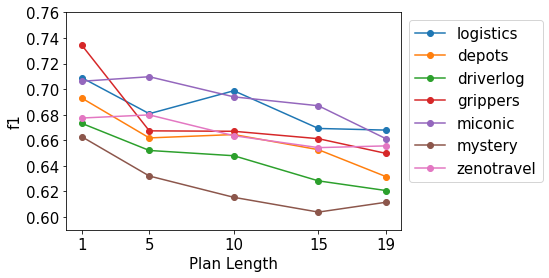

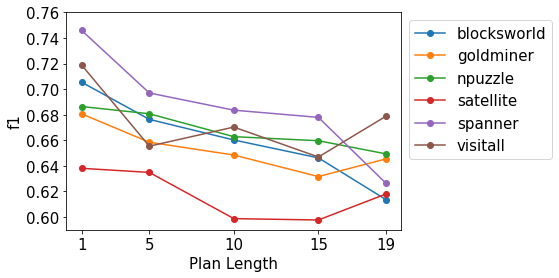

In [35]:
x = PLAN_LENGTHS

for domain_type, domain_ls in [(TRANSPORTATION_DOMAIN_KEY, TRANSPORTATION_DOMAINS), (NON_TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAINS)]:
    plt.figure()
    y_by_domain = {}
    for domain in domain_ls:
        y = []
        for plan_length in PLAN_LENGTHS:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs)
            y.append(res) 
        y_by_domain[domain] = y
        plt.plot(x, y, 'o-', label=domain)
    
    plt.ylim([0.59, 0.76])
    plt.xticks(PLAN_LENGTHS)
    # plt.title(f'{model_name} {prompt_type} {subs} {ramifications}')
    plt.legend(fontsize=15, bbox_to_anchor=(1, 1))
    plt.xticks(size=15)
    plt.xlabel('Plan Length', size=15)
    plt.yticks(size=15)
    plt.ylabel(score_key, size=15)
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f'{domain_type}.{answer_type}.{score_key}.{model_name}.{prompt_type}.{subs}.{ramifications}.1-19.pdf')
    plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
    plt.show()

# By Question Category

In [ ]:
for domain in [ALL_DOMAINS_KEY]: #[TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAIN_KEY]: #ALL_DOMAINS_KEY
    results_by_cat = defaultdict(list)
    for question_category in QUESTION_CATEGORIES[:-1]:#[:-2]:
        for plan_length in PLAN_LENGTHS:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs)
            results_by_cat[question_category].append(res)
            
    plt.figure()
    plt.plot(PLAN_LENGTHS, [0.5 for _ in range(len(PLAN_LENGTHS))], linestyle='dashed', color='black')

    for categoty, data in results_by_cat.items():
        plt.plot(PLAN_LENGTHS, data, 'o-', label=categoty)
    
    # plt.ylim([-0.1, 1.1])
    plt.xticks(PLAN_LENGTHS)
    # plt.title(f'{domain} {model_name} {prompt_type} {ramifications}')
    plt.legend(fontsize=15, loc=(1.04, 0))
    plt.xticks(size=15)
    plt.xlabel('Plan Length', size=15)
    plt.yticks(size=15)
    plt.ylabel(score_key, size=15)

    save_path = os.path.join(save_dir, f'question_category.{domain}.{answer_type}.{score_key}.{model_name}.{prompt_type}.{ramifications}.1-19.pdf')
    plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
    plt.show()

# By Ramifications

In [54]:
model_name = 'gemini'#'gemma-2b-it'
prompt_type = 'few_shot_1'
subs = WITHOUT_RANDOM_SUB
question_category = ALL_QUESTION_CATEGORIES_KEY

save_dir = os.path.join(STATISTICS_PATH, 'by_length_plots')

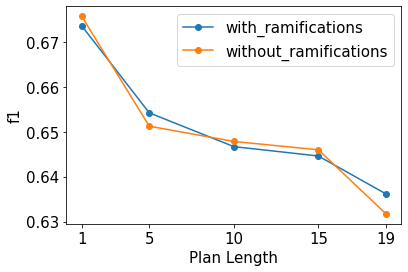

In [68]:
for domain in [ALL_DOMAINS_KEY]: #[TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAIN_KEY]: #ALL_DOMAINS_KEY DOMAIN_NAMES: 
    results_by_cat = defaultdict(list)
    for ramifications in RAMIFICATION_TYPES:
        for plan_length in PLAN_LENGTHS:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs)
            results_by_cat[ramifications].append(res)
            
    plt.figure()
    # plt.plot(PLAN_LENGTHS, [0.5 for _ in range(len(PLAN_LENGTHS))], linestyle='dashed', color='black')
    
    for categoty, data in results_by_cat.items():
        plt.plot(PLAN_LENGTHS, data, 'o-', label=categoty)
    
    # plt.ylim([0.6, 0.7])
    plt.xticks(PLAN_LENGTHS)
    # plt.title(f'{domain} {model_name} {prompt_type} {ramifications}')
    plt.legend(fontsize=15)
    plt.xticks(size=15)
    plt.xlabel('Plan Length', size=15)
    plt.yticks(size=15)
    plt.ylabel(score_key, size=15)
    
    save_path = os.path.join(save_dir, f'ramifications.{domain}.{answer_type}.{score_key}.{model_name}.{prompt_type}.{ramifications}.1-19.pdf')
    # plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
    plt.show()

# By Random Substitution

In [76]:
model_name = 'gemini'#'gemma-2b-it'
prompt_type = 'few_shot_1'
question_category = ALL_QUESTION_CATEGORIES_KEY
ramifications = WITH_RAMIFICATIONS

save_dir = os.path.join(STATISTICS_PATH, 'by_length_plots')

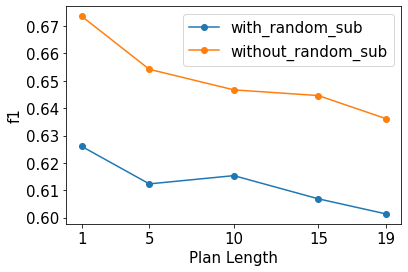

by plan length, random subs, ALL DOMAINS, true false answer, f1, gemini, few shot 1, with ramifications


In [84]:
for domain in [ALL_DOMAINS_KEY]: #[TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAIN_KEY]: #ALL_DOMAINS_KEY DOMAIN_NAMES: 
    results_by_cat = defaultdict(list)
    for subs in [WITH_RANDOM_SUB, WITHOUT_RANDOM_SUB]:
        for plan_length in PLAN_LENGTHS:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs)
            results_by_cat[subs].append(res)
            
    plt.figure()
    # plt.plot(PLAN_LENGTHS, [0.5 for _ in range(len(PLAN_LENGTHS))], linestyle='dashed', color='black')
    
    for categoty, data in results_by_cat.items():
        plt.plot(PLAN_LENGTHS, data, 'o-', label=categoty)
    
    # plt.ylim([0.6, 0.7])
    plt.xticks(PLAN_LENGTHS)
    # plt.title(f'{domain} {model_name} {prompt_type} {ramifications}')
    plt.legend(fontsize=15)
    plt.xticks(size=15)
    plt.xlabel('Plan Length', size=15)
    plt.yticks(size=15)
    plt.ylabel(score_key, size=15)
    
    save_name = f'random_subs.{domain}.{answer_type}.{score_key}.{model_name}.{prompt_type}.{ramifications}'
    save_path = os.path.join(save_dir, f'{save_name}.pdf')
    plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
    plt.show()
    print('by plan length,', ', '.join(k.replace('_', ' ') for k in save_name.split('.')))

In [77]:
results_by_cat

defaultdict(list,
            {'with_ramifications': [0.6260349208951553,
              0.6123244296500772,
              0.6153410011339705,
              0.6068646543330087,
              0.601356260595786,
              0.6735649174673565,
              0.6541805476558057,
              0.6466726108454244,
              0.6445831981835874,
              0.636143215065061]})